In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Row Locks:

In [3]:
predictions = pd.read_parquet('/Users/adamsorrenti/Documents/GitHub/lock-pred/results/fixed/exp-6-row-locks/predictions.parquet')
in_lock_sequences = pd.read_parquet('/Users/adamsorrenti/Documents/GitHub/lock-pred/results/fixed/exp-6-row-locks/in_lock_sequences.parquet')

In [17]:
predictions.head()

,in_lock_sequences_id,model,data,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,...,token_length_seq,lstm_pe,naive_baseline,disable_cache,model_weights,gt_table,gt_pageid,pred_table,pred_pageid,horizon_position
0,1,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,False,False,results/fixed/exp-6-row-locks/char__transforme...,orderline,65381,orderline,65381.0,1
1,2,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,False,False,results/fixed/exp-6-row-locks/char__transforme...,stock,2531,stock,37711.0,1
2,3,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,False,False,results/fixed/exp-6-row-locks/char__transforme...,orderline,65381,orderline,65381.0,1
3,4,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,False,False,results/fixed/exp-6-row-locks/char__transforme...,stock,77377,stock,21111.0,1
4,5,transformer,data/fixed/row_locks.csv,1.0,30,32,0.001,50,0.3,0.0,...,True,False,False,False,results/fixed/exp-6-row-locks/char__transforme...,stock,77377,stock,21111.0,1


In [18]:
in_lock_sequences.head()

,in_lock_sequences,in_lock_sequences_id
0,customer 5 4 9 1 8 history 6 2 9 1 warehouse 4...,1
1,history 6 2 9 1 warehouse 4 district 4 custome...,2
2,warehouse 4 district 4 customer 3 9 1 3 8 hist...,3
3,district 4 customer 3 9 1 3 8 history 6 2 9 1 ...,4
4,customer 3 9 1 3 8 history 6 2 9 1 district 5 ...,5


---

## Data Sanity Checks

In [38]:
predictions.describe()

,in_lock_sequences_id,train_data_percent_used,epochs,batch_size,learning_rate,seq_length,test_split,val_split,vocab_size,patience,horizon,gt_pageid,pred_pageid,horizon_position
count,8.005883e+07,80058830.0,80058830.0,80058830.0,8.005883e+07,80058830.0,8.005883e+07,80058830.0,80058830.0,80058830.0,80058830.0,8.005883e+07,8.004642e+07,80058830.0
mean,3.622722e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,3.0,4.946564e+04,1.725425e+15,2.0
std,2.104680e+05,0.0,0.0,0.0,2.385245e-18,0.0,3.241851e-14,0.0,0.0,0.0,1.0,2.659063e+04,1.036102e+19,1.0
min,1.000000e+00,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,1.0,1.000000e+00,0.000000e+00,1.0
25%,1.803920e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,2.0,2.741500e+04,3.857000e+03,1.0
50%,3.611360e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,3.0,6.494600e+04,6.359700e+04,2.0
75%,5.445760e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,4.0,6.687300e+04,6.627800e+04,3.0
max,7.293320e+05,1.0,30.0,32.0,1.000000e-03,50.0,3.000000e-01,0.0,900.0,5.0,4.0,9.091000e+04,6.845867e+22,4.0


### Lets see how many groups of predicitons exist
There should be 40, which is 10 repitions by 4 horizons

In [ ]:
unique_groups = predictions.drop(columns=['gt_pageid', 'pred_pageid', 'horizon_position', 'in_lock_sequences_id', 'gt_table', 'pred_table']).drop_duplicates()

In [50]:
unique_groups.nunique()

model                       1
data                        1
train_data_percent_used     1
epochs                      1
batch_size                  1
learning_rate               1
seq_length                  1
test_split                  1
val_split                   1
vocab_size                  1
tokenization                1
patience                    1
results_dir                 1
experiment_name             1
horizon                     4
shuffle                     1
add_start_end_tokens        1
add_row_id                  1
add_label_tokens            1
disable_train_shuffle       1
early_stopping              1
remove_system_tables        1
token_length_seq            1
lstm_pe                     1
naive_baseline              1
disable_cache               1
model_weights              40
dtype: int64

### Lets now check the number of rows for increasing number of horizons
This should be equal to a multiple of the number of rows when `horizon==1` (since each horzion positions is its own row)

In [52]:
num_of_pred = predictions[predictions['horizon'] == 1].shape[0]
num_of_pred

8005890

In [59]:
for horizon in predictions['horizon'].unique():
    assert num_of_pred * horizon == predictions[predictions['horizon'] == horizon].shape[0], (
        f"Number of predictions for horizon {horizon} is not correct.",
        f"Expected: {num_of_pred * horizon}",
        f"Actual: {predictions[predictions['horizon'] == horizon].shape[0]}",
        f"Difference: {num_of_pred * horizon - predictions[predictions['horizon'] == horizon].shape[0]}"
    )

AssertionError: ('Number of predictions for horizon 4 is not correct.', 'Expected: 32023560', 'Actual: 32023520', 'Difference: 40')

While I expected this assertion to hold, there may be a side-effect of sequence creation which larger horizons that I am not accounting for.

For example, depending if there is any overlap between sequence, it may account for there being less than exactly `num_of_pred * horizon`.

In [69]:
horizon_4_unqiue = predictions[predictions['horizon'] == 4]['model_weights'].groupby(predictions['model_weights'])
horizon_4_unqiue.count()

model_weights
results/fixed/exp-6-row-locks/char__transformer_20250115_155211_4a9914df-44e7-4709-b93f-2899a05761e4/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_164639_11d92135-a44b-4015-9a03-3e37c93283f8/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_173807_5849bb81-9b78-440c-a791-a0da558ef007/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_183129_be0f75cf-94dc-4ed3-b3af-5843eac87069/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_192614_f92ff2c9-4f61-464c-a2ce-8872fa2d0fdb/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_202048_efb07517-a3b6-42d6-87ca-ede888c20210/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_211559_dc0328e3-f880-49f2-a274-42326e1c06d5/model.keras    3202352
results/fixed/exp-6-row-locks/char__transformer_20250115_220832_37086c9c-1b81-463f-b306-6beb9cac68fd/model.keras    32

In [72]:
horizon_4_unqiue.count().sum() == 32023520

True

Above looks at how many rows there are for each repition of `horizon==4`. They are all the same, so this means we have 4 less rows for each of the 10 reps.

This equates to only 1 less test example (since we split by horizon position, thus 4 less rows means 1 less lock prediciton at `horizon==4`)

### Lets look at the distribution of pageid values

In [60]:
predictions['pred_pageid'].min(), predictions['pred_pageid'].max(), predictions['pred_pageid'].mean(), predictions['pred_pageid'].std()

(0.0, 6.845866623866862e+22, 1725424805245443.2, 1.0361023799303481e+19)

Thats a very wide range of predicted page_ids. Lets checkout the histogram.

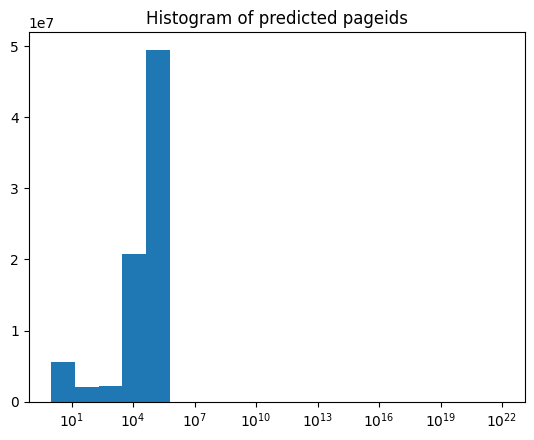

(8858, (80058830, 33))

In [61]:
plt.hist(predictions['pred_pageid'], bins=np.logspace(0, 22, 20))
plt.xscale('log')
plt.title('Histogram of predicted pageids')
plt.show()

(predictions['pred_pageid'] > 10e4).sum(), predictions.shape

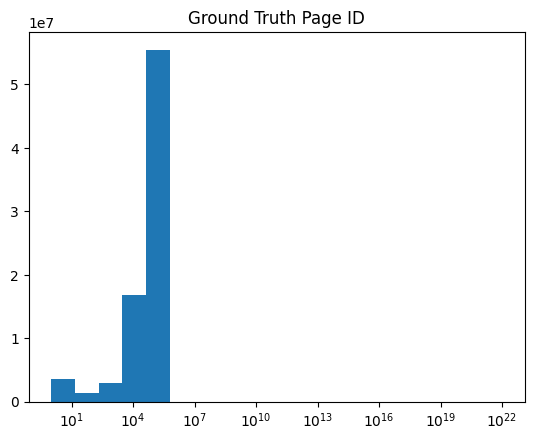

(0, (80058830, 33))

In [62]:
plt.hist(predictions['gt_pageid'], bins=np.logspace(0, 22, 20))
plt.xscale('log')
plt.title('Ground Truth Page ID')
plt.show()

(predictions['gt_pageid'] > 10e4).sum(), predictions.shape


Okay everything, looks normal. We just have a few outliers in the prediction, but the ground truth looks good.

## Global vs. Local Analysis